In [1]:
import numpy as np
import pandas as pd
import os.path as op
import matplotlib.pyplot as plt

In [2]:
z_cuts_upstream   = ['-.08', '-.08', '-.08', '-.08', '-.08', '-.09', '-.09' , '-.09' , '-.095', '-.095', '-.095' , '-.095' , '-.1'   ,  '-.1'  , '-.1'   , '-.1'   , '-.1'   , '-.105' , '-.105' ]
z_cuts_downstream = ['.1'  , '.1'  , '.1'  , '.1'  , '.1'  , '.1'  , '.1'   , '.1'   , '.1'   , '.1'   , '.1'    , '.1'    , '.105'  , '.105'  , '.105'  , '.105'  , '.105'  , '.11'   , '.11'   ]

kin = 16
kin_string = '16_1st'

target = "He3"

raw_location = "../../../../../data/pass2_raw/"

regen = False

accdf_path = "ACC_dfs/"

In [3]:
cut = 'T2==1 & nTracks==1 & W2>3.0 & (((Preshower + Shower)/Momentum)/1000.)>0.7'

ki = 0
if kin==16:
    ki = 11
elif kin<=5:
    ki = kin
else:
    ki = ((kin-5)/2)+5

cut = cut + ' & Z>' + z_cuts_upstream[ki] + ' & Z<' + z_cuts_downstream[ki] + ' & '
if kin==16:
    cut = cut + 'Cherenkov>2000'
else:
    cut = cut + 'Cherenkov>1500'
    
cut = cut + ' & dnew_rate>0.0'

tph = "Phi"
tth = "Theta"
accL = '(' + tph + ' + (1.1*' + tth + '))>-0.077'
accL = accL + ' & (' + tph + ' + (3.3*' + tth + '))>-0.198'
accL = accL + ' & (' + tph + ' - (3.3*' + tth + '))<0.198'
accL = accL + ' & (' + tph + ' - (1.1*' + tth + '))<0.077'
accL = accL + ' & (' + tph + ' + (1.1*' + tth + '))<0.088'
accL = accL + ' & (' + tph + ' + (3.3*' + tth + '))<0.231'
accL = accL + ' & (' + tph + ' - (3.3*' + tth + '))>-0.231'
accL = accL + ' & (' + tph + ' - (1.1*' + tth + '))>-0.088'
accL = accL + ' & ' + tph + ' < 0.033'
accL = accL + ' & ' + tph + ' > -0.033'
accL = accL + ' & dp>-0.035'
accL = accL + ' & dp<0.045'

accR = '((0.015*' + tph + ')-(0.037*' + tth + '))<0.00222'
accR = accR + ' & ' + tph + '<0.037'
accR = accR + ' & (' + tph + '+(14*' + tth + '))<0.877'
accR = accR + ' & ' + tph + '>-0.033'
accR = accR + ' & (' + tph + '+(6.6*' + tth + '))>-0.396'
accR = accR + ' & dp>-0.03'
accR = accR + ' & dp<0.045'
# accR = accR + ' & ((0.16*FPx)-(0.95*FPth))<0.0325'
# accR = accR + ' & ((0.155*FPx)-(0.95*FPth))>-0.027'
# accR = accR + ' & FPx<0.5'
# accR = accR + ' & FPx>-0.45'

In [4]:
df_list = []
data = pd.DataFrame()

if op.isfile(accdf_path+target+kin_string+".csv") and not regen:
    data = pd.read_csv(accdf_path+target+kin_string+".csv")
else:
    try:
        with open("../runlists/"+target+"_kin"+kin_string+".dat","r") as f:
            runs = f.read().splitlines()

            for run in runs:
                #print(run)
                run_events = pd.read_csv(raw_location + run + ".csv")
                run_events = run_events.replace([np.inf, -np.inf, np.nan, -np.nan], 0)

                df_list.append((run_events.query(cut))[['Phi','Theta','dp','FPx','FPth']])
                #cleaned.head()

    except FileNotFoundError:
        print("File Doesn't exist. Skipping Kinematic.")

    data = pd.concat(df_list, ignore_index=True)
    data.to_csv(accdf_path+target+kin_string+".csv")

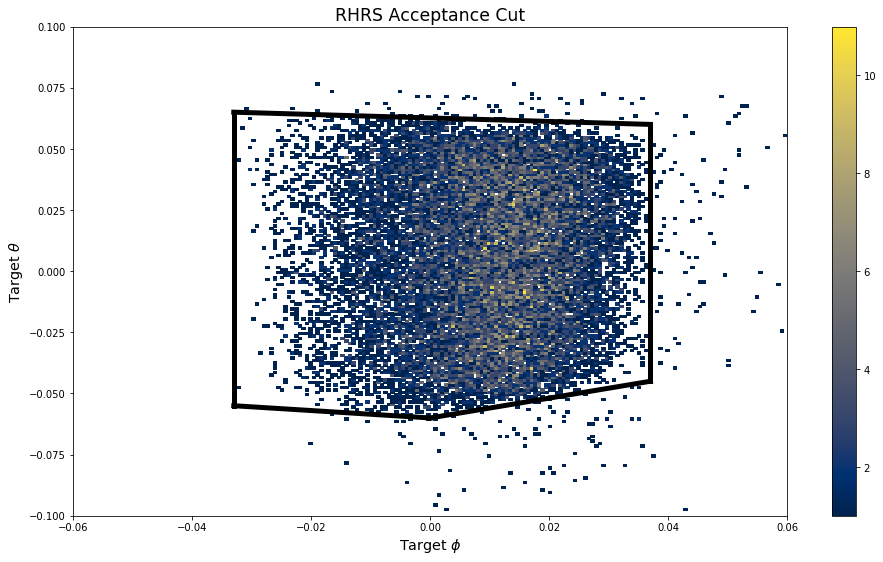

In [5]:
plt.figure(figsize=(16,9))
h = plt.hist2d(data.Phi,data.Theta,bins=200,range=[[-.06,.06],[-.1,.1]],cmap='cividis',cmin=1)
plt.colorbar(h[3])
plt.xlabel('Target $\phi$',fontsize='x-large')
plt.ylabel("Target $\\theta$",fontsize='x-large')
if kin!=16:
    plt.plot([0,0.0165],[0.07,0.065],'k-',lw=5)
    plt.plot([0.0165,0.033],[0.065,0.05],'k-',lw=5)
    plt.plot([0.033,0.033],[0.05,-0.04],'k-',lw=5)
    plt.plot([0.033,0.0165],[-0.04,-0.055],'k-',lw=5)
    plt.plot([0.0165,0],[-0.055,-0.06],'k-',lw=5)
    plt.plot([0,-0.0165],[-0.06,-0.055],'k-',lw=5)
    plt.plot([-0.0165,-0.033],[-0.055,-0.04],'k-',lw=5)
    plt.plot([-0.033,-0.033],[-0.04,0.05],'k-',lw=5)
    plt.plot([-0.033,-0.0165],[0.05,0.065],'k-',lw=5)
    plt.plot([-0.0165,0],[0.065,0.07],'k-',lw=5)
    
    plt.title("LHRS Acceptance Cut", fontsize='xx-large')
    #plt.savefig("LHRS_ACC.pdf")
else:
    plt.plot([0.037,0.037],[0.06,-0.045],'k-',lw=5)
    plt.plot([0.037,0],[-0.045,-0.06],'k-',lw=5)
    plt.plot([0,-0.033],[-0.06,-0.055],'k-',lw=5)
    plt.plot([-0.033,-0.033],[-0.055,0.065],'k-',lw=5)
    plt.plot([-0.033,0.037],[0.065,0.06],'k-',lw=5)
    
    plt.title("RHRS Acceptance Cut", fontsize='xx-large')
    #plt.savefig("RHRS_ACC.pdf")

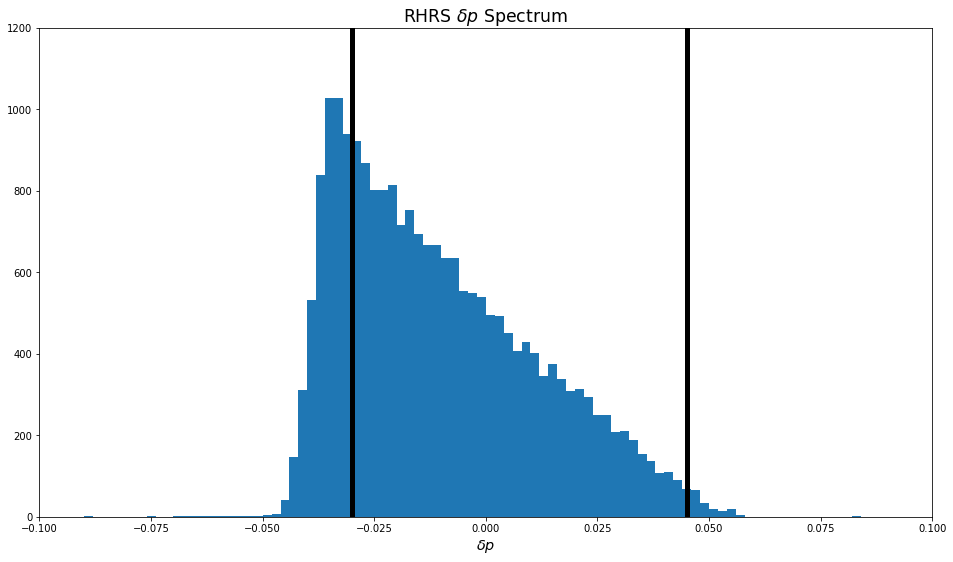

In [6]:
plt.figure(figsize=(16,9))
plt.hist(data.dp,bins=100,range=[-0.1,0.1])
plt.gca().set(xlim=(-0.1,0.1))
plt.xlabel('$\delta p$',fontsize='x-large')

if kin!=16:
    plt.gca().set(ylim=(0,20000))
    plt.title('LHRS $\delta p$ Spectrum',fontsize='xx-large')
    plt.plot([-.035,-.035],[0,20000],'k-',lw=5)
    plt.plot([.045,.045],[0,20000],'k-',lw=5)
    #plt.savefig("LHRS_dp.pdf")
else:
    plt.gca().set(ylim=(0,1200))
    plt.title('RHRS $\delta p$ Spectrum',fontsize='xx-large')
    plt.plot([-.03,-.03],[0,1200],'k-',lw=5)
    plt.plot([.045,.045],[0,1200],'k-',lw=5)
    #plt.savefig("RHRS_dp.pdf")

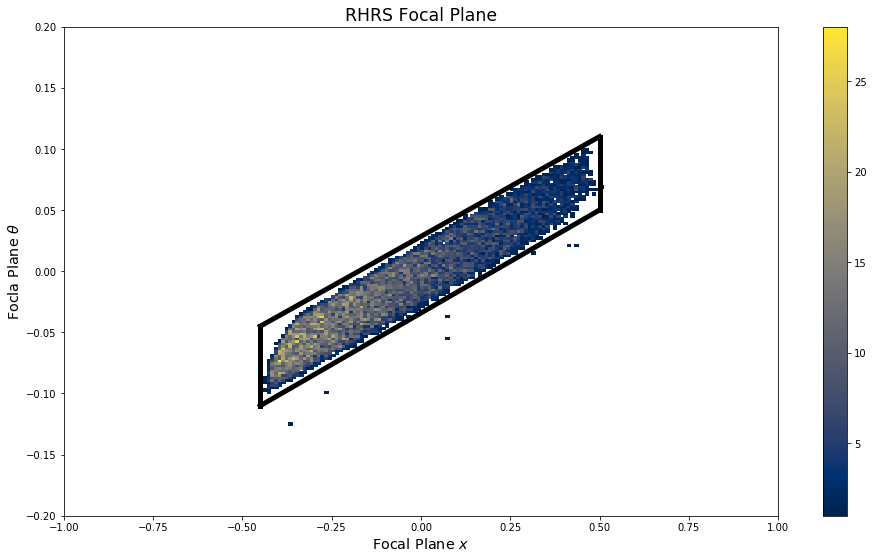

In [9]:
if kin==16:
    r_ev = data.query(accR)
    plt.figure(figsize=(16,9))
    h = plt.hist2d(r_ev.FPx,r_ev.FPth,bins=200,range=[[-1,1],[-.2,.2]],cmin=1,cmap='cividis')
    plt.colorbar(h[3])
    
    plt.title('RHRS Focal Plane',fontsize='xx-large')
    plt.xlabel('Focal Plane $x$',fontsize='x-large')
    plt.ylabel('Focla Plane $\\theta$',fontsize='x-large')
    
    plt.plot([.5,.5],[.11,.05],'k-',lw=5)
    plt.plot([.5,-.45],[.05,-.11],'k-',lw=5)
    plt.plot([-.45,-.45],[-.11,-.045],'k-',lw=5)
    plt.plot([-.45,.5],[-.045,.11],'k-',lw=5)
    plt.savefig("RHRS_fp.pdf")